In [4]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [5]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2

def ILEBR_star(symulation, p1, p2, delta = 0.05, epsilon = 0.01, n_max = n_max):
    LB = 0
    UB = 1
    t = 1
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[0.1, 0.9])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1
    elif UB < 0.5:
        return 0
    elif mu > 0.5:
        return 1
    else:
        return 0


In [42]:
%%cython
import numpy as np
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)

cdef float epsilon, delta, LB, UB, mu, sig
cdef int n_max
cdef int n, t
cdef list X_t

epsilon = 0.01
delta = 0.05
n_max = 213

def eB_n(n, sig, delta = 0.05, epsilon = 0.01):
    return sig * np.sqrt(2*np.log(3*n_max/delta)/n**2) + 3*np.log(3*n_max/delta)/n**2

def ILEBR_star_test(p, delta = 0.05, epsilon = 0.01, n_max = n_max):
    np.random.seed()
    LB = 0
    UB = 1
    t = 1
    sumx=0
    sumx2=0
    for n in range(1, n_max+1):
        for i in range(2*n - 1):
            Xt = np.random.choice([1, 0],p=[p, 1-p])
            # Xt= symulation(p1, p2)
            t+=1
            sumx += Xt
            sumx2 += Xt**2
            mu = sumx/(t)
            sig = np.sqrt(sumx2/t - mu**2)
        e_n = eB_n(n, sig)
        LB = max(LB, mu - e_n)
        UB = min(UB, mu + e_n)
        if UB - LB < 2*epsilon:
            break
        elif UB < 0.5:
            break
        elif LB > 0.5:
            break
    if LB > 0.5:
        return 1, n**2
    elif UB < 0.5:
        return 0, n**2
    elif mu > 0.5:
        return 1, n**2
    else:
        return 0, n**2


# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# # ps1 = np.linspace(0.495, 0.5+0.0005,3)

# x1_ILEBR2_star = np.array([pool.map(ILEBR_star_test, [p]*100) for p in ps1])

# ps2_star = np.arange(0, 0.5+0.05, 0.02)
# x2_ILEBR2_star = np.array([pool.map(ILEBR_star_test, [p]*100) for p in ps2_star])


In [67]:
from mpire import WorkerPool

pool = WorkerPool(n_jobs=4)
# x = pool.map(ILEBR_star_test, [0.49]*100)
x = [ILEBR_star_test(p=0.495, delta = 1, n_max = 171) for i in range(1000)]
# print(x)
x = np.array(x)
t = x[:,1]
winer = x[:,0]


In [70]:
sum(winer)

0

In [5]:
from scipy.stats import binom
import numpy as np

np.sum(np.array([binom.cdf(n**2*(0.5 + np.sqrt(0.49*(1-0.49))*np.sqrt(2*np.log(3/0.05*213)/n**2) + 3*np.log(3/0.05*213)/n**2), n = n**2, p=0.49) for n in range(1, 213)]))

211.9999999983712

In [8]:
sum(1-np.array([binom.cdf(n**2*(0.5 + np.sqrt(0.5*(1-0.5))*np.sqrt(2*np.log(3/0.05*213)/n**2) + 3*np.log(3/0.05*213)/n**2), n = n**2, p=0.49) for n in range(1, 213)]))

1.617001532672191e-09

In [94]:
binom.cdf(1, n = 213**2, p=0.49)

0.0

In [71]:
np.mean(t), np.max(t), np.min(t), 171**2

(28416.217, 29241, 7056, 29241)

In [34]:
x[:,0]

0

In [100]:
symulation_p_ILEBR2_star = x1_ILEBR2_star[:, :, 0]
symulation_n_ILEBR2_star = x2_ILEBR2_star[:, :, 1]

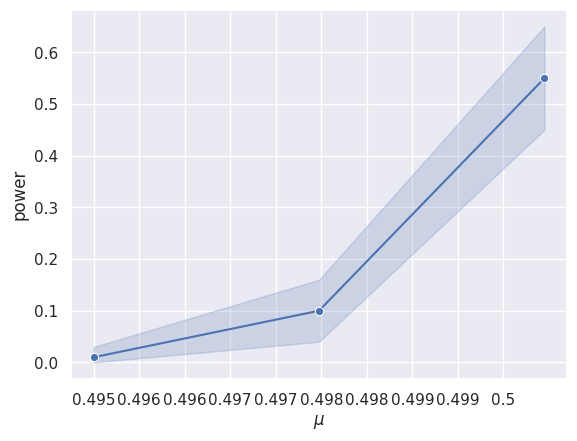

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="darkgrid")

ILEBR2_df_star = pd.DataFrame(symulation_p_ILEBR2_star).T.astype(int)
ILEBR2_df_star.columns = ps1
ILEBR2_df_star = pd.melt(ILEBR2_df_star)
sns.lineplot(data=ILEBR2_df, x="variable", y="value", marker="o")
xs = np.linspace(min(ps1), max(ps1),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("power")
plt.xlabel("$\mu$")
plt.show()

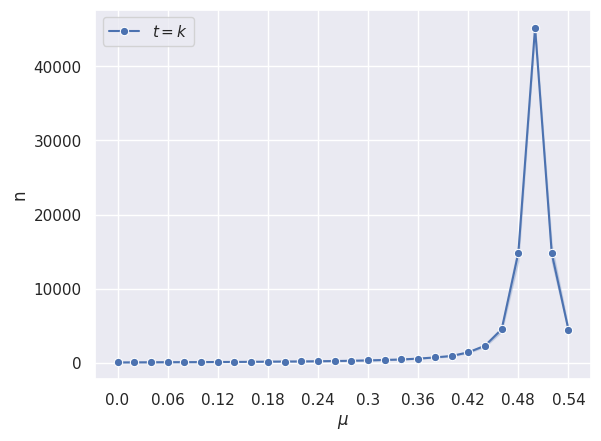

In [104]:
sns.set(style="darkgrid")

ILEBR2_df_n_df = pd.DataFrame(symulation_n_ILEBR2_star.T)
ILEBR2_df_n_df.columns = ps2_star
# LEBR_n_df = pd.melt(LEBR_df)
ILEBR2_df_n_df = pd.melt(ILEBR2_df_n_df)

# sns.boxplot(data=LEBR_n_df, x="variable", y="value", color= "black", medianprops={"color": "red"})
sns.lineplot(data=ILEBR2_df_n_df, x="variable", y="value", marker= 'o')
xs = np.linspace(min(ps2_star),max(ps2_star),10)
plt.xticks(xs, np.round(xs, 3))
# xs = np.linspace(min(ps2),max(ps2),len(ps))
# plt.xticks(range(len(ps)), np.round(xs, 3))

plt.ylabel("n")
plt.xlabel("$\mu$")
plt.legend(["$t=k$"])
# plt.xticks(range(len(ps)),(np.linspace(min(ps2),max(ps2),len(ps)))

# df1 = LEBR_df.assign(type = 1)
# df2 = (LEBR_df+0.01).assign(type = 2)
# df = pd.concat([df1,df2])
# df = pd.melt(LEBR_df, id_vars="type")

# sns.boxplot(data = df, x="variable", y="value",hue="type")
plt.show()